In [1]:
import pandas as pd
import numpy as np
import rpy2
import matplotlib.pyplot as plt
# R magic using rpy2!
%load_ext rpy2.ipython

In [2]:
import sys
print(sys.executable)
sys.path

D:\Anaconda3\envs\temp\python.exe


['c:\\Users\\ville_000\\Desktop\\temp',
 'c:\\Users\\ville_000\\.vscode\\extensions\\ms-python.python-2020.5.80290\\pythonFiles',
 'c:\\Users\\ville_000\\.vscode\\extensions\\ms-python.python-2020.5.80290\\pythonFiles\\lib\\python',
 'D:\\Anaconda3\\envs\\temp\\python36.zip',
 'D:\\Anaconda3\\envs\\temp\\DLLs',
 'D:\\Anaconda3\\envs\\temp\\lib',
 'D:\\Anaconda3\\envs\\temp',
 '',
 'C:\\Users\\ville_000\\AppData\\Roaming\\Python\\Python36\\site-packages',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages\\win32',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages\\win32\\lib',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages\\Pythonwin',
 'D:\\Anaconda3\\envs\\temp\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\ville_000\\.ipython']

In [3]:
%%R -o gg,df
gg = file.path(R.home("bin"), "R")
df = data.frame(x=1:5,y=5:1,z=rep(5,5))

In [4]:
gg

'D:/Anaconda3/envs/temp/lib/R/bin/x64/R'


In [5]:
df

,x,y,z
0,1,5,5.0
1,2,4,5.0
2,3,3,5.0
3,4,2,5.0
4,5,1,5.0


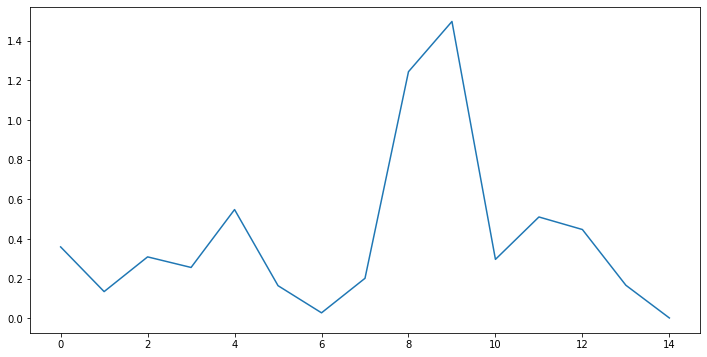

In [6]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
_ = ax.plot(np.arange(0,15,1), np.random.exponential(scale=0.5, size=15))